# Linear Algebra with NumPy - Norms and Eigendecompositions
### Presented by Eduonix!

Practice makes perfect! In the lectures, we've discussed vector and matrix norms, vector normalizations, and eigendecompositions. In this project, we'll use NumPy to perform these operations in python and cement our understanding of the concepts. 

To get started, lets verify that we're using the same version of Python. Furthermore, let's import NumPy and the NumPy Linear Algebra package. 

In [1]:
import sys
import numpy as np
from numpy import linalg

print 'Python: {}'.format(sys.version)
print 'NumPy: {}'.format(np.__version__)

Python: 2.7.13 |Continuum Analytics, Inc.| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]
NumPy: 1.14.1


### Vector and Matrix Norms

Calculating the vector or matrix norm is straight forward with NumPy, simply use the linalg.norm() function!

In [2]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [3]:
# reshape array into 3x3 matrix
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [4]:
# Euclidean (L2) Norm - Default
print np.linalg.norm(A)
print np.linalg.norm(B)

8.306623862918075
8.306623862918075


In [5]:
# The Frobenius norm is the L2 norm for a Matrix
print np.linalg.norm(B, 'fro')

8.306623862918075


In [6]:
# the L1 norm
print np.linalg.norm(A, 1)
print np.linalg.norm(B, 1)

21.0
8.0


In [7]:
# the max norm (P = infinity)
print np.linalg.norm(A, np.inf)
print np.linalg.norm(B, np.inf)

5.0
12.0


### Vector Normalization

In [8]:
# normalization to produce unit vector
norm = np.linalg.norm(A, 2)
A_unit = A / norm

print A_unit

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [9]:
# the magnitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

1.0

### Eigendecomposition

Eigenvalues and eigenvectors are easy to find with Python and NumPy. Remember, an eigenvector of a square matrix $\textbf{A}$ is a nozero vector $\textbf{v}$ such that multiplication by $\textbf{A}$ alters only the scale of $\textbf{v}$ 
$$\textbf{Av} = \lambda\textbf{v} $$ The scalar $\lambda$ is known as the eigenvalue corresponding to this eigenvector.

In [10]:
# find the eigenvalues and eigenvectors for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [12]:
# returns the eigenvalues for the matrix
eigenvalues

array([1., 2., 3.])

In [13]:
# returns the eigenvectors for the matrix
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
# the eigenvalue w[i] corresponds to the eigenvector v[:, i]
print 'Eigenvalue: {}'.format(eigenvalues[1])
print 'Eigenvector: {}'.format(eigenvectors[:,1])

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


We can easily double check that these are the correct eigenvalues and eigenvectors, by plugging them back into the eigendecomposition equation.
The eigendecomposition of $\textbf{A}$ is given by $$\textbf{A} = \textbf{V}diag(\lambda)\textbf{V}^{-1}$$ where $\lambda$ is equal to a vector of the eigenvalues, and $\textbf{V}$ is a matrix with one eigenvector per column.

In [15]:
# verify eigendecomposition - should return original matrix
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print output

[[1 0 0]
 [0 2 0]
 [0 0 3]]


Eigenvectors and eigenvalues can often seem difficult conceptually. It is helpful to visualize the eigenvectors and their multiplication with the original matrix, $\textbf{A}$. Using matplotlib, we can accomplish this quickly.

In [16]:
# import necessary matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

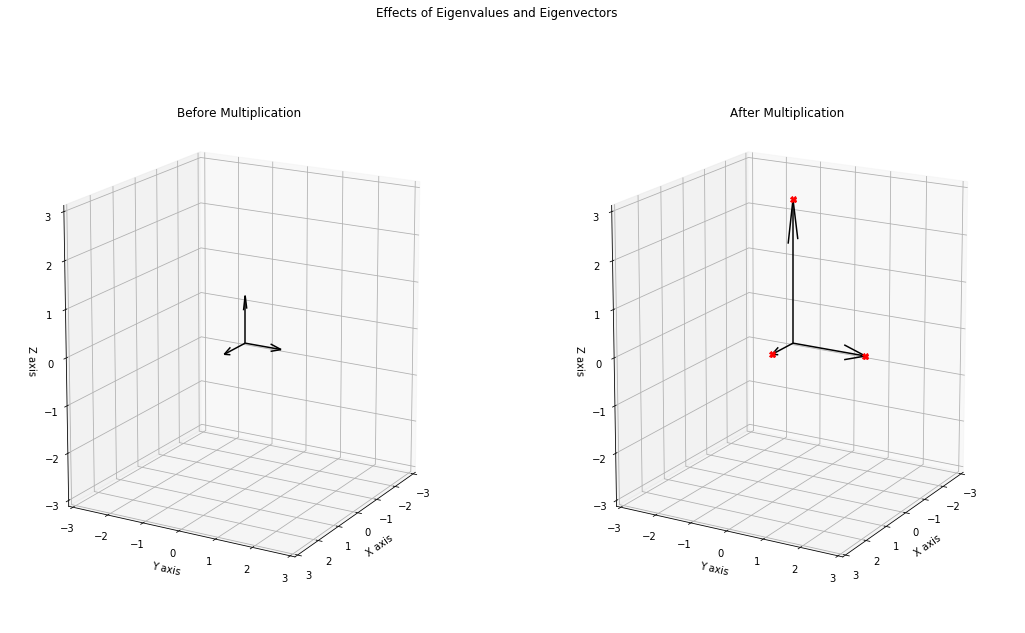

In [17]:
# plot the eigenvectors
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues and Eigenvectors')
ax1 = fig.add_subplot(121, projection='3d')

ax1.quiver(origin, origin, origin, eigenvectors[0, :], eigenvectors[1, :], eigenvectors[2, :], color = 'k')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15, 30)
ax1.set_title("Before Multiplication")

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection='3d')

# plot the new vectors
ax2.quiver(origin, origin, origin, new_eig[0, :], new_eig[1, :], new_eig[2, :], color = 'k')

# plot the eigenvalues for each vector (the amount the vector should be scaled by)
ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]), (eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_title("After Multiplication")
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15, 30)

# show the plot!
plt.show()